**Problem Statement:**

Phishing
is a type of fraud in which an attacker impersonates a reputable company or
person in order to get sensitive information such as login credentials or account
information via email or other communication channels. Phishing is popular among
attackers because it is easier to persuade someone to click a malicious link that appears
to be authentic than it is to break through a computer's protection measures.
The mail goal is to predict whether the domains are real or malicious.
Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms thats best fit for the above case.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
data['url'].unique()

array(['http://www.crestonwood.com/router.php',
       'http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4',
       'https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_',
       ...,
       'https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal',
       'http://www.mypublicdomainpictures.com/',
       'http://174.139.46.123/ap/signin?openid.pape.max_auth_age=0&amp;openid.return_to=https%3A%2F%2Fwww.amazon.co.jp%2F%3Fref_%3Dnav_em_hd_re_signin&amp;openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.assoc_handle=jpflex&amp;openid.mode=checkid_setup&amp;key=a@b.c&amp;openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&amp;&amp;ref_=nav_em_hd_clc_signin'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
data.shape

(11430, 89)

In [ ]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data["status"] = data["status"].map({"legitimate":1, "phishing":0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
import re
def preprocess_url(url):
  url = url.replace(" ", "")
  url = url.lower()
  url = re.sub("[^a-zA-Z0-9]", "", url)
  url = url[:50]
  encoded_url = np.zeros(len(ALPHABET))
  for i, c in enumerate(url):
    encoded_url[ALPHABET.index(c)] = 1
  return encoded_url

In [ ]:
names= data["url"]
labels = data["status"]

In [ ]:
ALPHABET = "abcdefghijklmnopqrstuvwxyz0123456789-._~"
names = names.apply(preprocess_url)

In [ ]:
vectorizer = TfidfVectorizer(stop_words ='english')
names = list(map(str, names))
X_train_tfidf = vectorizer.fit_transform(names)
X_test_tfidf = vectorizer.transform(labels)

ValueError: ignored

In [ ]:
data.drop(['url'], axis = 1, inplace = True)

In [ ]:
x = data.drop("status", axis=1)
y = data["status"]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [ ]:
lr = LogisticRegression().fit(x_train,y_train)

In [ ]:
lr.coef_

array([[-1.00821791e-02, -2.59710202e-03, -5.77923268e-05,
        -2.93139195e-04,  1.50699418e-05, -1.13969490e-05,
        -5.57242937e-05, -6.53046611e-05,  0.00000000e+00,
        -1.13363819e-04, -3.97498388e-05, -1.26719128e-06,
        -3.04272411e-05, -4.99358892e-04, -2.70200063e-07,
        -8.04185693e-05, -6.08795294e-07, -2.87717615e-05,
        -7.59532033e-07, -3.12280716e-06,  7.18306557e-05,
        -3.41237662e-05, -3.18329970e-06, -5.63612357e-06,
        -6.40283651e-05, -1.73321605e-05, -1.06779133e-05,
        -1.67451129e-07, -2.32077544e-07, -1.36411236e-05,
        -2.07849650e-05, -9.37638929e-06, -1.85440721e-04,
        -4.98779154e-05, -5.70236064e-06, -3.00433221e-05,
         3.27825587e-08, -3.03799258e-05, -1.48935168e-06,
        -9.07457968e-04, -2.06760315e-04, -1.69167044e-04,
        -7.19170867e-04, -2.92640388e-04, -2.97666128e-03,
        -9.89944080e-04, -2.89065039e-03, -7.95273312e-04,
        -8.22616775e-04, -1.00226117e-03, -1.47887305e-0

In [ ]:
lr.intercept_

array([-6.82228244e-05])

In [ ]:
ypred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,ypred)

0.7909011373578303

In [ ]:
print(confusion_matrix(y_test, ypred))

[[855 276]
 [202 953]]


In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1131
           1       0.78      0.83      0.80      1155

    accuracy                           0.79      2286
   macro avg       0.79      0.79      0.79      2286
weighted avg       0.79      0.79      0.79      2286



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC().fit(x_train, y_train)

In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.6019247594050744

In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      1131
           1       0.75      0.32      0.45      1155

    accuracy                           0.60      2286
   macro avg       0.65      0.60      0.57      2286
weighted avg       0.66      0.60      0.57      2286



In [ ]:
print(confusion_matrix(y_test, svc_pred))

[[1005  126]
 [ 784  371]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB().fit(x_train, y_train)

In [ ]:
nb_pred = nb.predict(x_test)

In [ ]:
accuracy_score(y_test,nb_pred)

0.7480314960629921

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1131
           1       0.83      0.63      0.72      1155

    accuracy                           0.75      2286
   macro avg       0.76      0.75      0.74      2286
weighted avg       0.76      0.75      0.74      2286



In [ ]:
print(confusion_matrix(y_test, nb_pred))

[[980 151]
 [425 730]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5002378098924903, 0.9772727272727273, 'x[85] <= 0.5\ngini = 0.5\nsamples = 9144\nvalue = [4584, 4560]'),
 Text(0.2382528348309799, 0.9318181818181818, 'x[86] <= 0.5\ngini = 0.194\nsamples = 4250\nvalue = [463, 3787]'),
 Text(0.07171587505348738, 0.8863636363636364, 'x[39] <= 2.5\ngini = 0.416\nsamples = 217\nvalue = [153, 64]'),
 Text(0.048951647411210955, 0.8409090909090909, 'x[56] <= 45.5\ngini = 0.5\nsamples = 108\nvalue = [54, 54]'),
 Text(0.03080872913992298, 0.7954545454545454, 'x[42] <= 4.5\ngini = 0.451\nsamples = 70\nvalue = [46, 24]'),
 Text(0.017800599058622166, 0.75, 'x[56] <= 28.0\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.010954214805305947, 0.7045454545454546, 'x[48] <= 6.25\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.005477107402652974, 0.6590909090909091, 'x[0] <= 19.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.002738553701326487, 0.6136363636363636, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.008215661103979461, 0.61

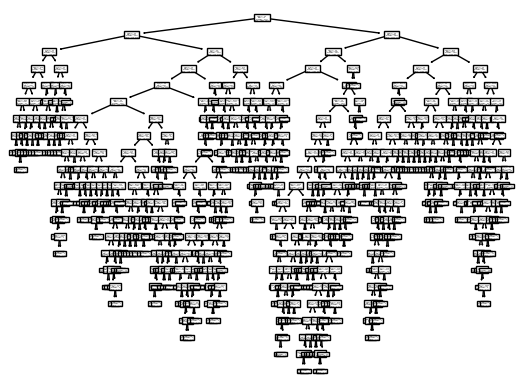

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [ ]:
dtc_pred = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,dtc_pred)

0.9361329833770778

In [ ]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1131
           1       0.94      0.93      0.94      1155

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



In [ ]:
print(confusion_matrix(y_test, dtc_pred))

[[1062   69]
 [  77 1078]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,rfc_pred)

0.9698162729658792

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1131
           1       0.97      0.97      0.97      1155

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [ ]:
print(confusion_matrix(y_test, rfc_pred))

[[1097   34]
 [  35 1120]]


# Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier().fit(x_train, y_train)
etc_pred = etc.predict(x_test)
print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1131
           1       0.97      0.97      0.97      1155

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [ ]:
accuracy_score(y_test,etc_pred)

0.9706911636045494

In [ ]:
print(confusion_matrix(y_test, etc_pred))

[[1093   38]
 [  29 1126]]


**LOGISTIC REGRESSION**:

ACCURACY SCORE:0.7909011373578303


**SVM:**

ACCURACY SCORE:0.6019247594050744

**RANDOM FOREST:**

ACCURACY SCORE:0.9698162729658792

**DECISION TREE:**

ACCURACY SCORE:0.9361329833770778

**NAIVE BAYES:**

ACCURACY SCORE:0.7480314960629921

**EXTRA TREE CLASSIFIER**:


ACCURACY SCORE:0.9706911636045494

**Conclusion:**
The classification model Extra Tree Classifier is having highest accuracy